In [442]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# SGM files to Dataframe

## Sgm to Soup

In [2]:
for file in os.listdir("data"):
    if file.endswith(".sgm"):
        print(os.path.join("data", file))

data\reut2-000.sgm
data\reut2-001.sgm
data\reut2-002.sgm
data\reut2-003.sgm
data\reut2-004.sgm
data\reut2-005.sgm
data\reut2-006.sgm
data\reut2-007.sgm
data\reut2-008.sgm
data\reut2-009.sgm
data\reut2-010.sgm
data\reut2-011.sgm
data\reut2-012.sgm
data\reut2-013.sgm
data\reut2-014.sgm
data\reut2-015.sgm
data\reut2-016.sgm
data\reut2-017.sgm
data\reut2-018.sgm
data\reut2-019.sgm
data\reut2-020.sgm
data\reut2-021.sgm


In [3]:
data = ""
for file in os.listdir("data"):
    if file.endswith(".sgm"):
        with open(os.path.join("data", file)) as f:
            data += f.read() + "\n"

In [4]:
soup = BeautifulSoup(data)

In [5]:
#print(soup.prettify())

In [6]:
articles = soup.findAll('reuters')

In [7]:
col_values = articles[998].find('topics').findAll('d')
[(t.get_text()) for t in col_values]

['money-fx', 'interest']

In [8]:
articles[0]

<reuters cgisplit="TRAINING-SET" lewissplit="TRAIN" newid="1" oldid="5544" topics="YES">
<date>26-FEB-1987 15:01:01.79</date>
<topics><d>cocoa</d></topics>
<places><d>el-salvador</d><d>usa</d><d>uruguay</d></places>
<people></people>
<orgs></orgs>
<exchanges></exchanges>
<companies></companies>
<unknown> 
C T
f0704reute
u f BC-BAHIA-COCOA-REVIEW   02-26 0105</unknown>
<text>
<title>BAHIA COCOA REVIEW</title>
<dateline>    SALVADOR, Feb 26 - </dateline>Showers continued throughout the week in
the Bahia cocoa zone, alleviating the drought since early
January and improving prospects for the coming temporao,
although normal humidity levels have not been restored,
Comissaria Smith said in its weekly review.
    The dry period means the temporao will be late this year.
    Arrivals for the week ended February 22 were 155,221 bags
of 60 kilos making a cumulative total for the season of 5.93
mln against 5.81 at the same stage last year. Again it seems
that cocoa delivered earlier on consignmen

## Soup to DataFrame

In [9]:
topics_to_use = ["money-fx", "ship", "interest", "acq", "earn"]
#columns = ["date", 'topics', "places", "people", "orgs", "exchanges", "companies", "title", "dateline", "body"]
columns = ["date", 'topics', "places", "people", "orgs", "exchanges", "companies", "text"]

In [10]:
articles_json = []
for i, a in enumerate(articles):
    art = {}
    for col in columns:
        sgm_col = a.find(col)
            
        if col in ["topics", "places", "people", "orgs", "exchanges", "companies"]:
            col_values = sgm_col.findAll('d')
            txt_col_values = [(t.get_text()) for t in col_values]
            
            if col == "topics" and True not in [(t in topics_to_use) for t in txt_col_values]:
                txt_col_values = ["other"]
                
            txt_col_values = txt_col_values 
        else:
            txt_col_values = sgm_col.get_text()
        art[col] = txt_col_values


    articles_json.append(art)

In [11]:
articles_json[0]

{'date': '26-FEB-1987 15:01:01.79',
 'topics': ['other'],
 'places': ['el-salvador', 'usa', 'uruguay'],
 'people': [],
 'orgs': [],
 'exchanges': [],
 'companies': [],
 'text': '\nBAHIA COCOA REVIEW\n    SALVADOR, Feb 26 - Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n    Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\n

In [372]:
df = pd.DataFrame(articles_json)

In [373]:
df

,date,topics,places,people,orgs,exchanges,companies,text
0,26-FEB-1987 15:01:01.79,[other],"[el-salvador, usa, uruguay]",[],[],[],[],"\nBAHIA COCOA REVIEW\n SALVADOR, Feb 26 - S..."
1,26-FEB-1987 15:02:20.00,[other],[usa],[],[],[],[],\nSTANDARD OIL <SRD> TO FORM FINANCIAL UNIT\n ...
2,26-FEB-1987 15:03:27.51,[other],[usa],[],[],[],[],\nTEXAS COMMERCE BANCSHARES <TCB> FILES PLAN\n...
3,26-FEB-1987 15:07:13.72,[other],"[usa, brazil]",[],[],[],[],\nTALKING POINT/BANKAMERICA <BAC> EQUITY OFFER...
4,26-FEB-1987 15:10:44.60,[other],[usa],[],[],[],[],\nNATIONAL AVERAGE PRICES FOR FARMER-OWNED RES...
...,...,...,...,...,...,...,...,...
21573,19-OCT-1987 00:34:08.94,[ship],"[hong-kong, japan, india, pakistan, iran, iraq]",[],[],[],[],\nJAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CH...
21574,19-OCT-1987 00:18:22.79,[other],[ussr],[],[],[],[],\nSOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 198...
21575,19-OCT-1987 00:05:11.26,[other],[south-africa],[],[],[],[],\nSIX KILLED IN SOUTH AFRICAN GOLD MINE ACCIDE...
21576,19-OCT-1987 00:03:21.69,[other],[switzerland],[],[],[],[],\nPROJECTIONS SHOW SWISS VOTERS WANT TRIED PAR...


In [374]:
df["text"][0]

'\nBAHIA COCOA REVIEW\n    SALVADOR, Feb 26 - Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n    Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\nare a few hundred thousand bags still in the hands of farmers,\nmiddlemen, exporters and processors.\n    There a

# Dataframe preparation

In [375]:
topics_to_use.append("other")

### Remove non-target topics in articles with multiples topics

In [376]:
column_topic = []
for topics in df.topics.values:
    top = []
    for t in topics:
        if t in topics_to_use:
            top.append(t) 
    column_topic.append(top)
column_topic = np.array(column_topic,dtype=object)

In [377]:
df.topics = column_topic

In [378]:
df

,date,topics,places,people,orgs,exchanges,companies,text
0,26-FEB-1987 15:01:01.79,[other],"[el-salvador, usa, uruguay]",[],[],[],[],"\nBAHIA COCOA REVIEW\n SALVADOR, Feb 26 - S..."
1,26-FEB-1987 15:02:20.00,[other],[usa],[],[],[],[],\nSTANDARD OIL <SRD> TO FORM FINANCIAL UNIT\n ...
2,26-FEB-1987 15:03:27.51,[other],[usa],[],[],[],[],\nTEXAS COMMERCE BANCSHARES <TCB> FILES PLAN\n...
3,26-FEB-1987 15:07:13.72,[other],"[usa, brazil]",[],[],[],[],\nTALKING POINT/BANKAMERICA <BAC> EQUITY OFFER...
4,26-FEB-1987 15:10:44.60,[other],[usa],[],[],[],[],\nNATIONAL AVERAGE PRICES FOR FARMER-OWNED RES...
...,...,...,...,...,...,...,...,...
21573,19-OCT-1987 00:34:08.94,[ship],"[hong-kong, japan, india, pakistan, iran, iraq]",[],[],[],[],\nJAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CH...
21574,19-OCT-1987 00:18:22.79,[other],[ussr],[],[],[],[],\nSOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 198...
21575,19-OCT-1987 00:05:11.26,[other],[south-africa],[],[],[],[],\nSIX KILLED IN SOUTH AFRICAN GOLD MINE ACCIDE...
21576,19-OCT-1987 00:03:21.69,[other],[switzerland],[],[],[],[],\nPROJECTIONS SHOW SWISS VOTERS WANT TRIED PAR...


### Remove articles with 2 or more target topics

In [379]:
cmt = 0
for topics in df.topics.values:
    if len(topics) != 1:
        cmt += 1
        
print("Number of articles with at least 2 target topics :", cmt)

Number of articles with at least 2 target topics : 230


In [380]:
df = df[[len(t) == 1 for t in df.topics]].reset_index(drop=True)
df

,date,topics,places,people,orgs,exchanges,companies,text
0,26-FEB-1987 15:01:01.79,[other],"[el-salvador, usa, uruguay]",[],[],[],[],"\nBAHIA COCOA REVIEW\n SALVADOR, Feb 26 - S..."
1,26-FEB-1987 15:02:20.00,[other],[usa],[],[],[],[],\nSTANDARD OIL <SRD> TO FORM FINANCIAL UNIT\n ...
2,26-FEB-1987 15:03:27.51,[other],[usa],[],[],[],[],\nTEXAS COMMERCE BANCSHARES <TCB> FILES PLAN\n...
3,26-FEB-1987 15:07:13.72,[other],"[usa, brazil]",[],[],[],[],\nTALKING POINT/BANKAMERICA <BAC> EQUITY OFFER...
4,26-FEB-1987 15:10:44.60,[other],[usa],[],[],[],[],\nNATIONAL AVERAGE PRICES FOR FARMER-OWNED RES...
...,...,...,...,...,...,...,...,...
21343,19-OCT-1987 00:34:08.94,[ship],"[hong-kong, japan, india, pakistan, iran, iraq]",[],[],[],[],\nJAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CH...
21344,19-OCT-1987 00:18:22.79,[other],[ussr],[],[],[],[],\nSOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 198...
21345,19-OCT-1987 00:05:11.26,[other],[south-africa],[],[],[],[],\nSIX KILLED IN SOUTH AFRICAN GOLD MINE ACCIDE...
21346,19-OCT-1987 00:03:21.69,[other],[switzerland],[],[],[],[],\nPROJECTIONS SHOW SWISS VOTERS WANT TRIED PAR...


### Clean  Dataframe

In [381]:
column_topic = []
for topics in df.topics.values:
    column_topic.append(topics[0])
column_topic = np.array(column_topic,dtype=object)
df.topics = column_topic

In [382]:
df

,date,topics,places,people,orgs,exchanges,companies,text
0,26-FEB-1987 15:01:01.79,other,"[el-salvador, usa, uruguay]",[],[],[],[],"\nBAHIA COCOA REVIEW\n SALVADOR, Feb 26 - S..."
1,26-FEB-1987 15:02:20.00,other,[usa],[],[],[],[],\nSTANDARD OIL <SRD> TO FORM FINANCIAL UNIT\n ...
2,26-FEB-1987 15:03:27.51,other,[usa],[],[],[],[],\nTEXAS COMMERCE BANCSHARES <TCB> FILES PLAN\n...
3,26-FEB-1987 15:07:13.72,other,"[usa, brazil]",[],[],[],[],\nTALKING POINT/BANKAMERICA <BAC> EQUITY OFFER...
4,26-FEB-1987 15:10:44.60,other,[usa],[],[],[],[],\nNATIONAL AVERAGE PRICES FOR FARMER-OWNED RES...
...,...,...,...,...,...,...,...,...
21343,19-OCT-1987 00:34:08.94,ship,"[hong-kong, japan, india, pakistan, iran, iraq]",[],[],[],[],\nJAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CH...
21344,19-OCT-1987 00:18:22.79,other,[ussr],[],[],[],[],\nSOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 198...
21345,19-OCT-1987 00:05:11.26,other,[south-africa],[],[],[],[],\nSIX KILLED IN SOUTH AFRICAN GOLD MINE ACCIDE...
21346,19-OCT-1987 00:03:21.69,other,[switzerland],[],[],[],[],\nPROJECTIONS SHOW SWISS VOTERS WANT TRIED PAR...


other       13754
earn         3967
acq          2422
money-fx      597
interest      310
ship          298
Name: topics, dtype: int64


<AxesSubplot: >

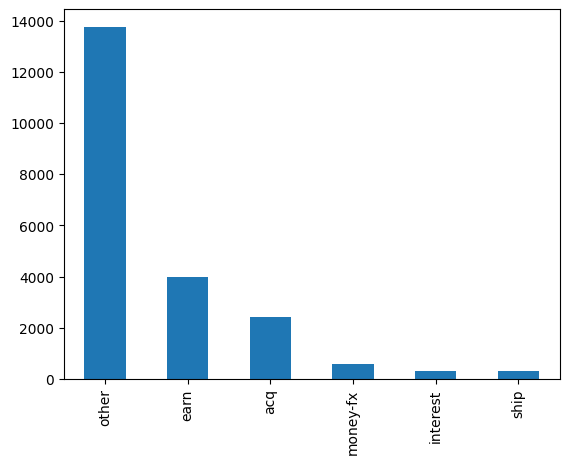

In [383]:
print(df.topics.value_counts())
df.topics.value_counts().plot(kind='bar')

# Data Analysis

In [387]:
df_topics = {"earn":None, "acq":None, "money-fx":None, "interest":None, "ship":None, "other":None}
for key in df_topics.keys():
    df_topics[key] = df[[t == key for t in df.topics]].reset_index(drop=True)

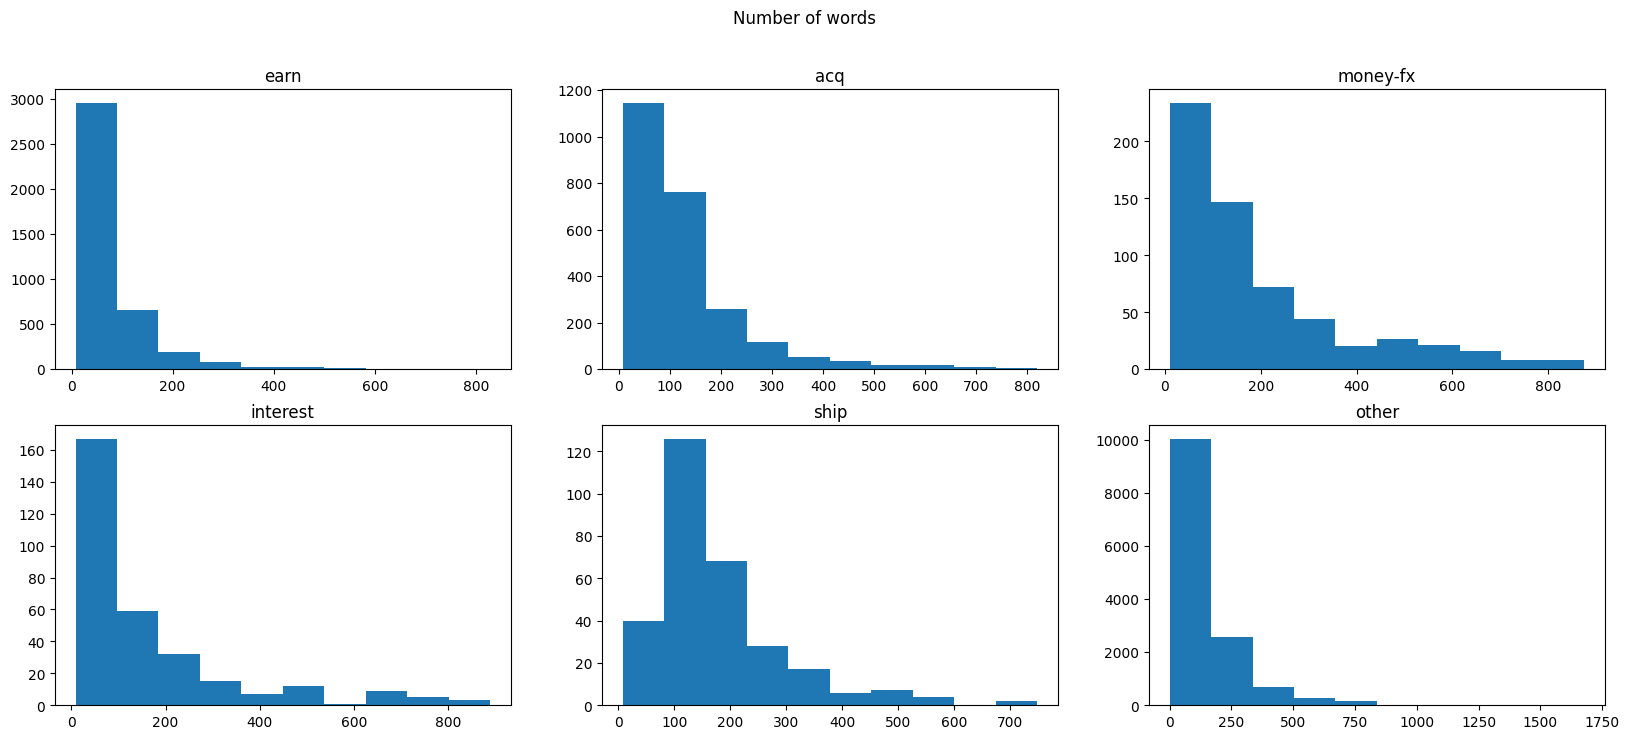

In [410]:
fig, axs = plt.subplots(2, 3)
fig.suptitle('Number of words')
fig.set_size_inches(20, 8)

keys = list(df_topics.keys())
k = 0
for i in range(2):
    for j in range(3):
        axs[i, j].set_title(keys[k])
        axs[i, j].hist(df_topics[keys[k]].text.str.split().map(lambda x: len(x)))
        k += 1
plt.show()

In [430]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.update(["said", "reuter"]) 

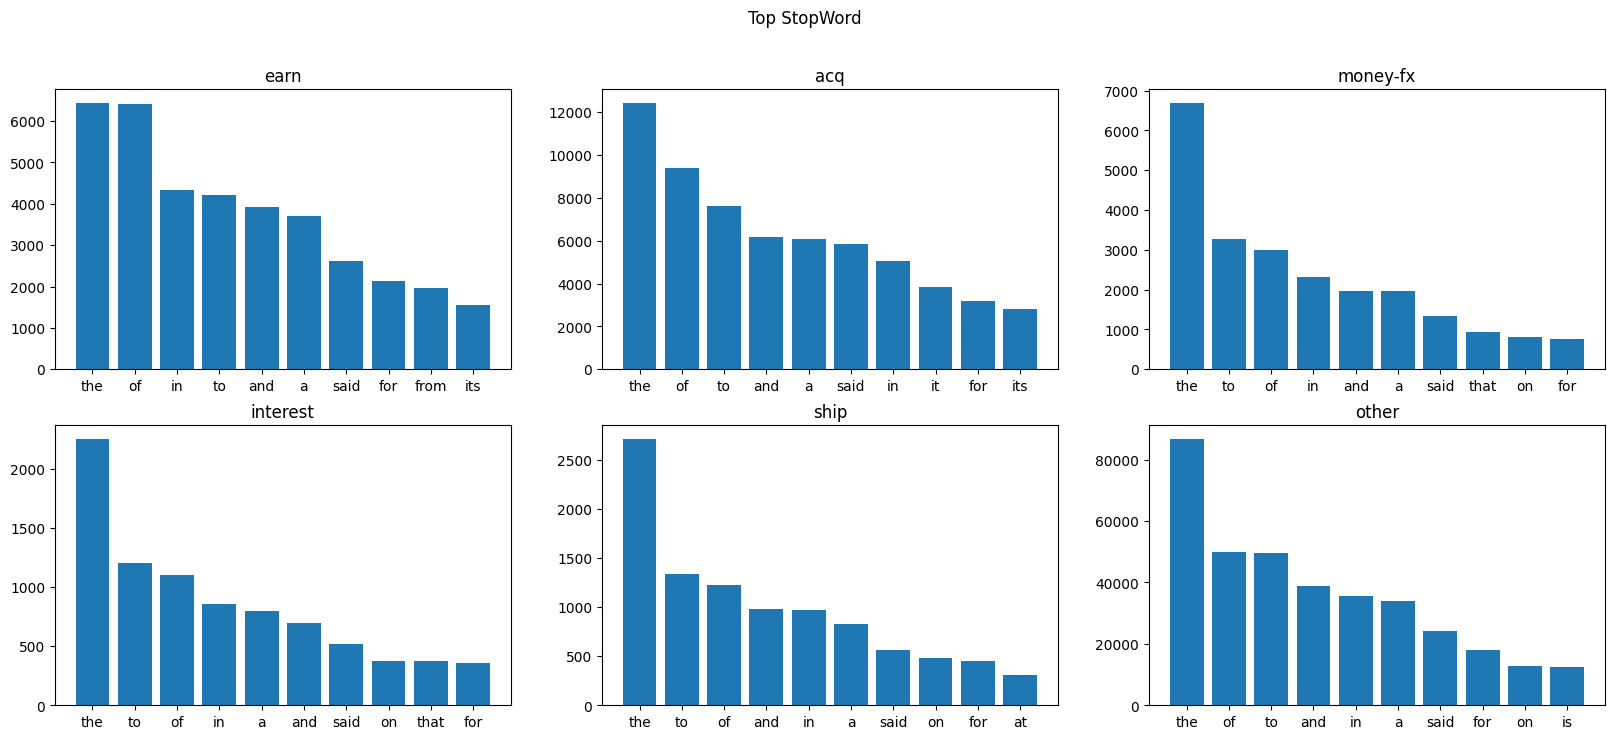

In [431]:
def freq_stopword(key):
    corpus = []
    articles = df_topics[key].text.str.split()
    articles = articles.values.tolist()
    corpus = [word for i in articles for word in i]

    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in STOPWORDS:
            dic[word]+=1
    return dic

fig, axs = plt.subplots(2, 3)
fig.suptitle('Top StopWord')
fig.set_size_inches(20, 8)

keys = list(df_topics.keys())
k = 0
for i in range(2):
    for j in range(3):
        print()
        top = sorted(freq_stopword(keys[k]).items(), key=lambda x:x[1],reverse=True)[:10]
        x, y = zip(*top)
        axs[i, j].set_title(keys[k])
        axs[i, j].bar(x, y)
        k += 1
plt.show()


### WORD CLOUD

In [432]:
def getWordCloud(df):
    comment_words = '' 
    stopwords = set(STOPWORDS)          # remove stop word (was, and, but...)
    
    for val in df.text: 
        val = str(val) 
        tokens = val.split() 
        
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        
        comment_words += " ".join(tokens) + " "
        
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
    return wordcloud

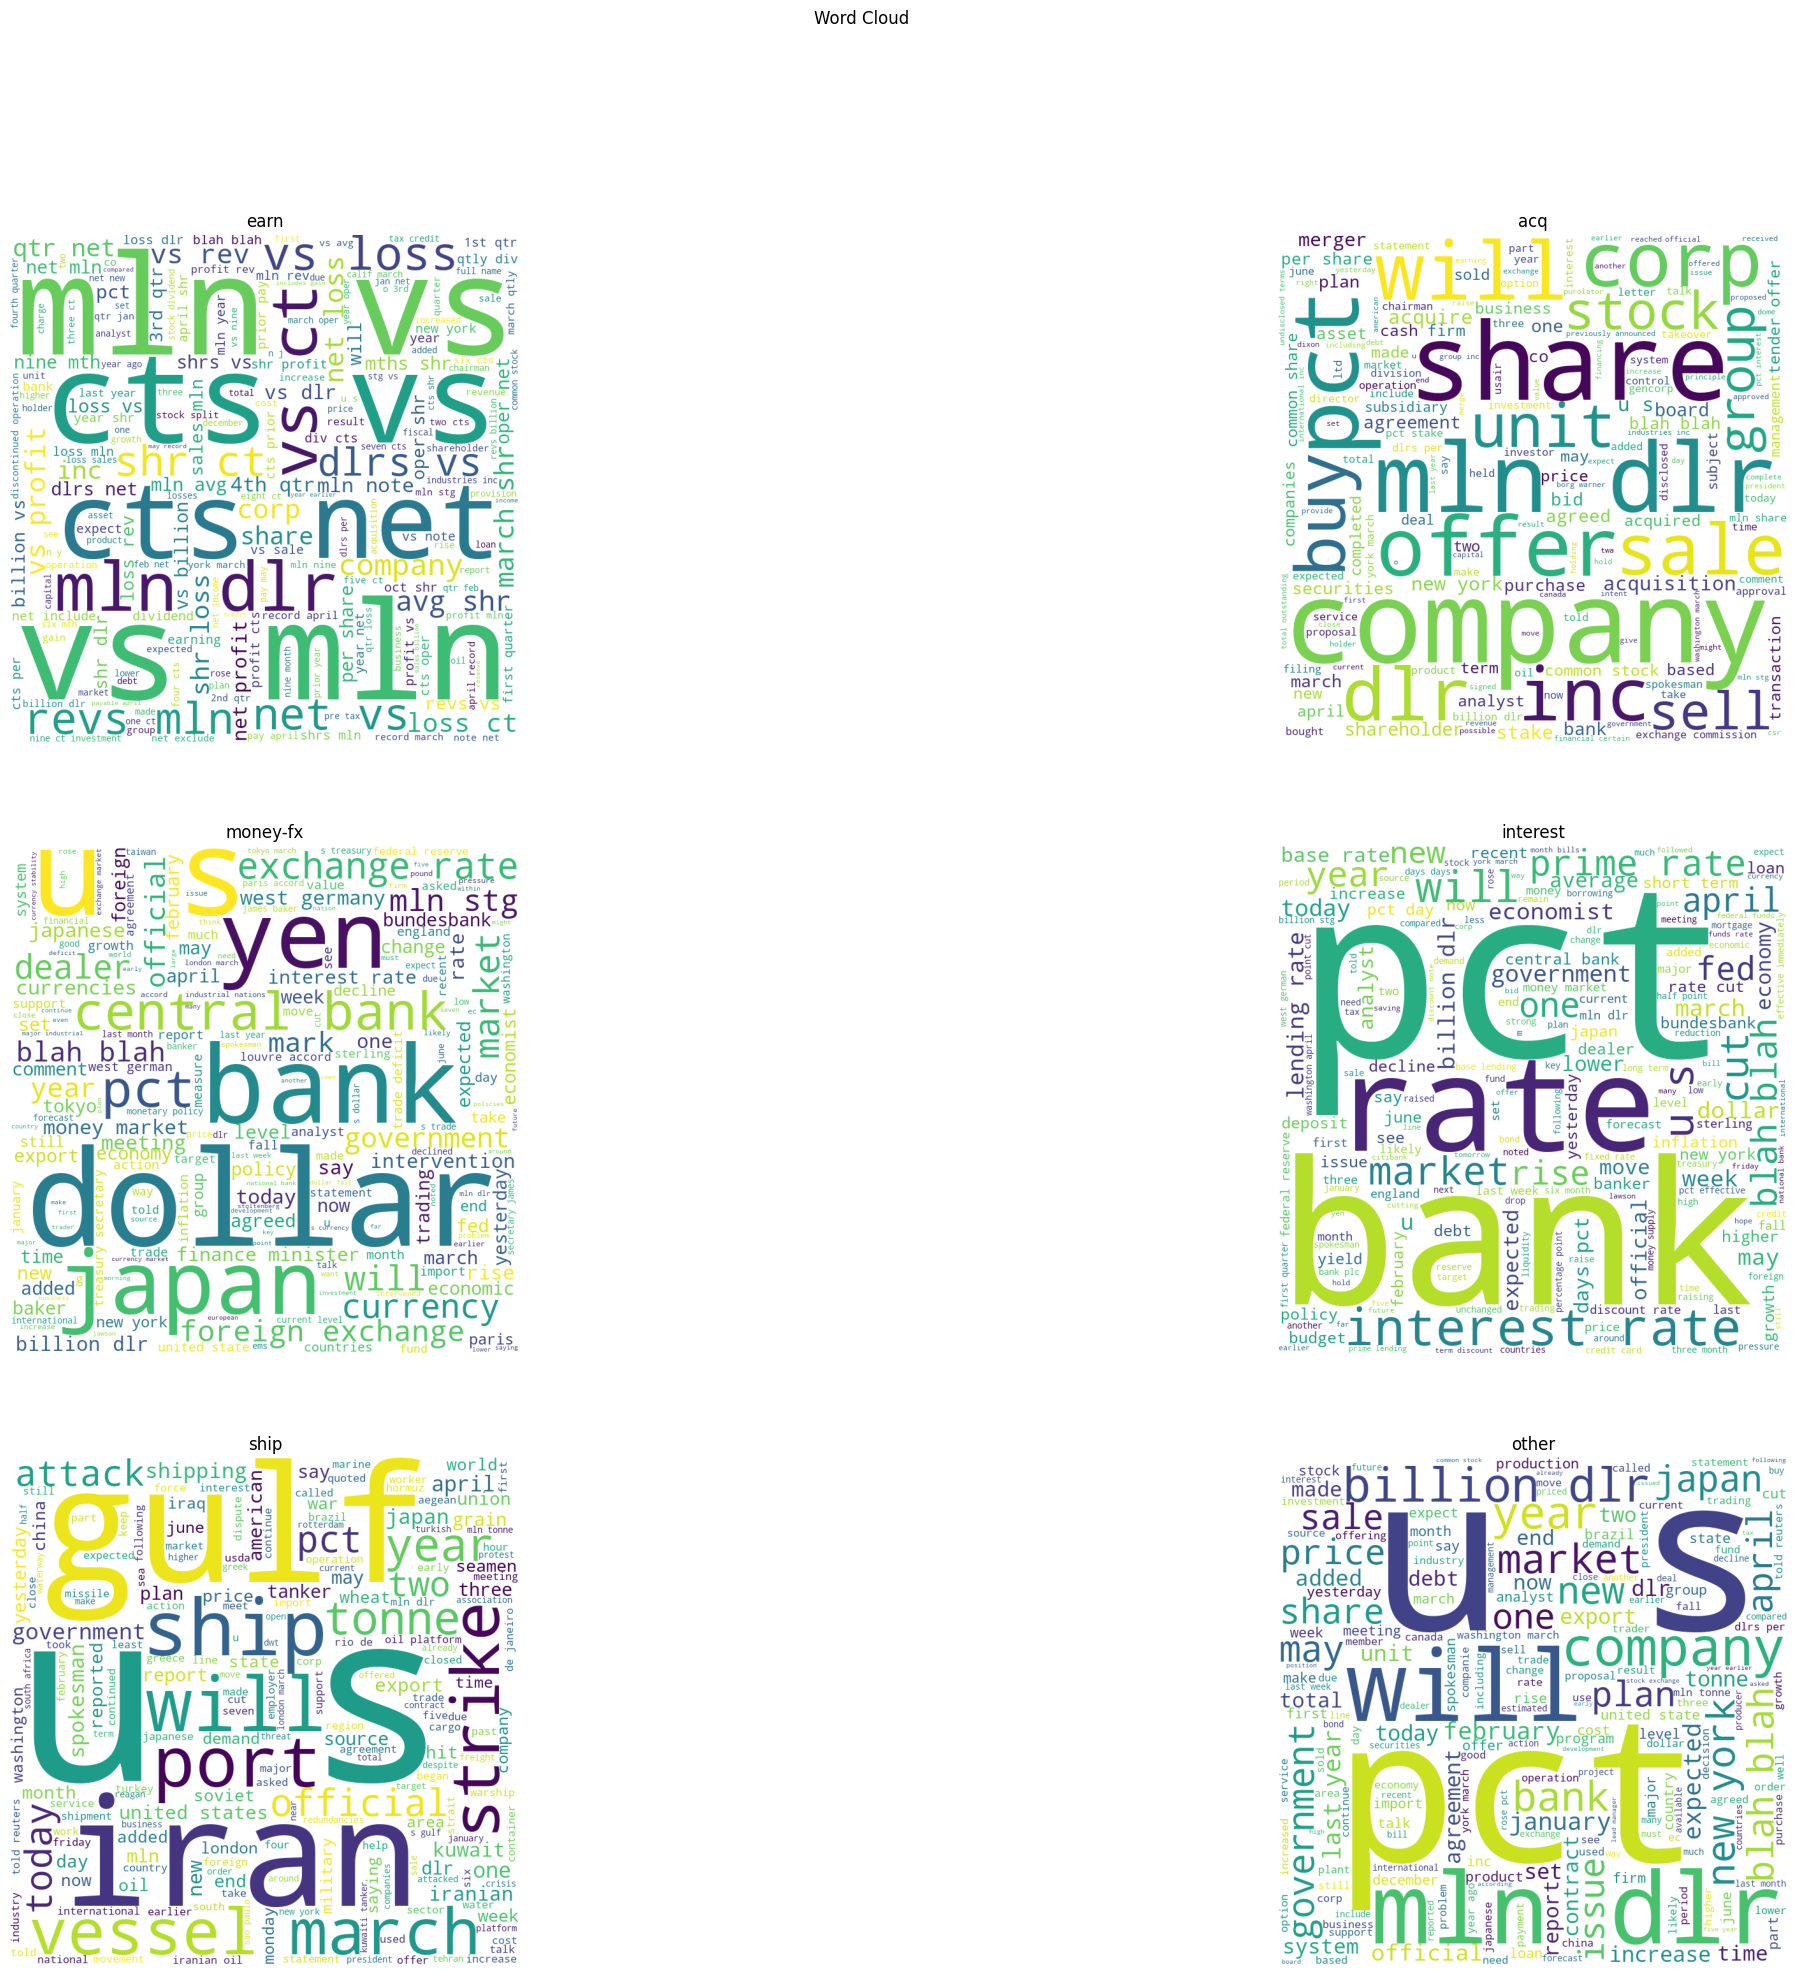

In [433]:
fig, axs = plt.subplots(3, 2)
fig.suptitle('Word Cloud')
fig.set_size_inches(30, 22.5)

keys = list(df_topics.keys())
k = 0
for i in range(3):
    for j in range(2):
        axs[i, j].set_title(keys[k])
        axs[i, j].imshow(getWordCloud(df_topics[keys[k]]))
        axs[i, j].axis("off")
        k += 1

plt.show()

In [439]:
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")

### Entity Frequencies

0
1
2
3
4
5


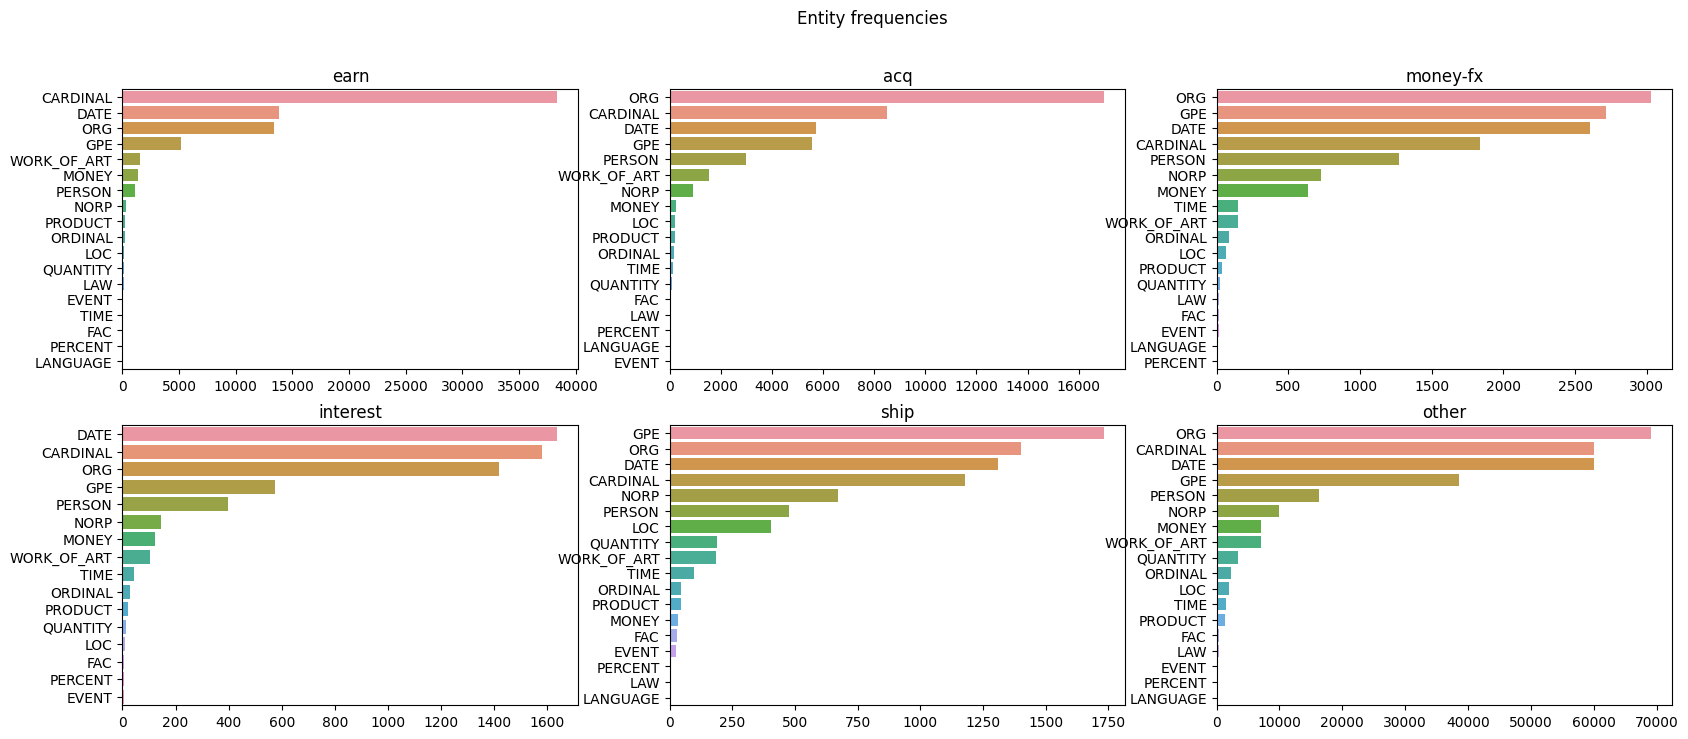

In [450]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

fig, axs = plt.subplots(2, 3)
fig.suptitle('Entity frequencies')
fig.set_size_inches(20, 8)

keys = list(df_topics.keys())
k = 0
for i in range(2):
    for j in range(3):
        print(k)
        ent = df_topics[keys[k]].text.apply(lambda x : ner(x))
        ent = [x for sub in ent for x in sub]

        counter = Counter(ent)
        count = counter.most_common()
        
        x, y = map(list,zip(*count))
        axs[i, j].set_title(keys[k])
        sns.barplot(ax=axs[i, j], x=y, y=x)
        k += 1
plt.show()

# PREDICTION

In [29]:
topics_names = {
    0: "earn",
    1: "acq",
    2: "money-fx",
    3: "interest",
    4: "ship",
    5: "other"
}

In [30]:
df_train = df[['text', 'topics']].copy()
df_train["topics"].replace(["earn", "acq", "money-fx", "interest", "ship", "other"], [0, 1, 2, 3, 4, 5], inplace=True)
df_train

,text,topics
0,\nCHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT\...,0
1,\nCOMPUTER TERMINAL SYSTEMS <CPML> COMPLETES S...,1
2,"\nCOBANCO INC <CBCO> YEAR NET\n SANTA CRUZ,...",0
3,\nAM INTERNATIONAL INC <AM> 2ND QTR JAN 31\n ...,0
4,\nBROWN-FORMAN INC <BFD> 4TH QTR NET\n LOUI...,0
...,...,...
21343,\nCOMPETITION TOUGHENS FOR NEAR-SUPERCOMPUTERS...,5
21344,\nSOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 198...,5
21345,\nSIX KILLED IN SOUTH AFRICAN GOLD MINE ACCIDE...,5
21346,\nPROJECTIONS SHOW SWISS VOTERS WANT TRIED PAR...,5


In [31]:
df_train["text"][0]

'\nCHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT\n    ROCHESTER, N.Y., Feb 26 - Champion Products Inc said its\nboard of directors approved a two-for-one stock split of its\ncommon shares for shareholders of record as of April 1, 1987.\n    The company also said its board voted to recommend to\nshareholders at the annual meeting April 23 an increase in the\nauthorized capital stock from five mln to 25 mln shares.\n Reuter\n'

In [32]:
df_train.to_csv("reut.csv", index=False)

In [150]:
X = df_train["text"]
y = df_train["topics"]
X.shape

(21348,)

## Split

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Pre Processing

In [164]:
from nltk.stem.porter import PorterStemmer
import nltk

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer = tokenize, stop_words = 'english')

## Classifiers

### Function

In [347]:
clfs_names = ["RandomForest", "MultinomialNB", "OneVsRes", "Multi-layer Perceptron"]

In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

def cl_fit(X_train, y_train):
    rfc = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
    clfNB = MultinomialNB().fit(X_train, y_train)
    clfOneVs = OneVsRestClassifier(LinearSVC()).fit(X_train, y_train)
    
    clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2,), max_iter=200, random_state=1).fit(X_train, y_train)
    
    return [rfc, clfNB, clfOneVs, clf_mlp]

In [323]:
from sklearn.model_selection import KFold, cross_val_score

def cross_validation(clfs, X_train, y_train):
    
    kf = KFold(n_splits=10, random_state = 42, shuffle = True)
    scores = []
    for c in clfs:
        scores.append(cross_val_score(c, X_train, y_train, cv = kf))
    
    return scores

In [333]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def display_scores(clfs_names, clfs, X_train, y_train, X_test, y_test, cross_val=True):
    if cross_val:
        scores = cross_validation(clfs, X_train, y_train)
        print("-------------------Score Cross Validation-------------------\n")
        for name, s in zip(clfs_names, scores):
            print(name)
            print('Cross-validation scores:', s)
            print('Cross-validation accuracy: {:.4f} (+/- {:.4f})\n'.format(s.mean(), s.std() * 2))
        
    print("-----------------------Score Test set-----------------------\n")
    for name, c in zip(clfs_names, clfs):
        predicted = c.predict(X_test)
        print(name)
        print("accuracy :", accuracy_score(y_test, predicted))
        print("each f1 score :", f1_score(y_test, predicted, average=None))
        print("macro f1 score :", f1_score(y_test, predicted, average="macro"), "\n")

In [325]:
import tensorflow as tf

def build_neural_network(input_size):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(512, input_dim=input_size, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(6, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### UnderSampling

In [326]:
import random
def sample_together(n, X, y):
    rows = random.sample(np.arange(0,len(X.index)).tolist(),n)
    return X.iloc[rows,], y.iloc[rows,]

In [327]:
def undersample(X, y, under = 4):  #topics == 4 is the under label
    y_min = y[y == under]
    X_min = X.filter(y_min.index,axis = 0)
    y_res = y_min
    
    for i in [0, 1, 2, 3, 5]:
        y_i = y[y == i]
        X_i = X.filter(y_i.index,axis = 0)
        X_i, y_i = sample_together(len(y_min.index), X_i, y_i)
        y_res = pd.concat([y_res, y_i]).sample(frac=1)
        
    X_res = X.filter(y_res.index,axis = 0)
    return X_res, y_res

In [328]:
X_train_under, y_train_under = undersample(X_train, y_train)

In [329]:
y_train_under.value_counts()

1    238
3    238
4    238
2    238
5    238
0    238
Name: topics, dtype: int64

In [330]:
#Vectorized the data
X_train_under = vectorizer.fit_transform(X_train_under).toarray()
X_test_under = vectorizer.transform(X_test).toarray()

#### Random Forest / MultinomialNB / OneVsRest / Multi-layer Perceptron

In [331]:
clfs = cl_fit(X_train_under, y_train_under)

In [334]:
display_scores(clfs_names, clfs, X_train_under, y_train_under, X_test_under, y_test, cross_val=False)

-----------------------Score Test set-----------------------

RandomForest
accuracy : 0.6480093676814989
each f1 score : [0.88482633 0.57635468 0.39848197 0.34113712 0.37710438 0.65558767]
macro f1 score : 0.5389153580154118 

MultinomialNB
accuracy : 0.4885245901639344
each f1 score : [0.86609337 0.58986815 0.23347107 0.20206186 0.2248062  0.42033124]
macro f1 score : 0.4227719806843185 

OneVsRes
accuracy : 0.7505854800936768
each f1 score : [0.90307329 0.70499244 0.53608247 0.38436482 0.3877551  0.77363897]
macro f1 score : 0.6149845145585651 

Multi-layer Perceptron (1 couche)
accuracy : 0.4887587822014052
each f1 score : [0.86360698 0.26896112 0.1997406  0.14229249 0.65753425 0.52336916]
macro f1 score : 0.44258409900331275 

Multi-layer Perceptron (2 couche)
accuracy : 0.7161592505854801
each f1 score : [0.88958595 0.63202012 0.52956298 0.38157895 0.24637681 0.75764098]
macro f1 score : 0.5727942978518031 

Multi-layer Perceptron (3 couches)
accuracy : 0.6517564402810304
each f1 

#### Neural Network

In [269]:
training_labels = tf.keras.utils.to_categorical(y_train_under)
testing_labels = tf.keras.utils.to_categorical(y_test)

In [277]:
nn = build_neural_network(X_train_under)
history = nn.fit(X_train_under, training_labels, shuffle=True ,
                    epochs=10, batch_size=32, 
                    validation_split=0.2, verbose=1)

Epoch 1/10
36/36 [==============================] - 1s 15ms/step - loss: 1.7268 - accuracy: 0.5193 - val_loss: 1.6341 - val_accuracy: 0.6958
Epoch 2/10
36/36 [==============================] - 0s 13ms/step - loss: 1.4718 - accuracy: 0.7741 - val_loss: 1.3908 - val_accuracy: 0.7692
Epoch 3/10
36/36 [==============================] - 0s 13ms/step - loss: 1.1730 - accuracy: 0.8643 - val_loss: 1.1476 - val_accuracy: 0.7867
Epoch 4/10
36/36 [==============================] - 1s 15ms/step - loss: 0.8890 - accuracy: 0.8792 - val_loss: 0.9517 - val_accuracy: 0.8252
Epoch 5/10
36/36 [==============================] - 1s 21ms/step - loss: 0.6899 - accuracy: 0.9212 - val_loss: 0.8109 - val_accuracy: 0.8357
Epoch 6/10
36/36 [==============================] - 1s 25ms/step - loss: 0.5301 - accuracy: 0.9282 - val_loss: 0.7161 - val_accuracy: 0.8287
Epoch 7/10
36/36 [==============================] - 0s 13ms/step - loss: 0.4034 - accuracy: 0.9667 - val_loss: 0.6523 - val_accuracy: 0.8357
Epoch 8/10
36

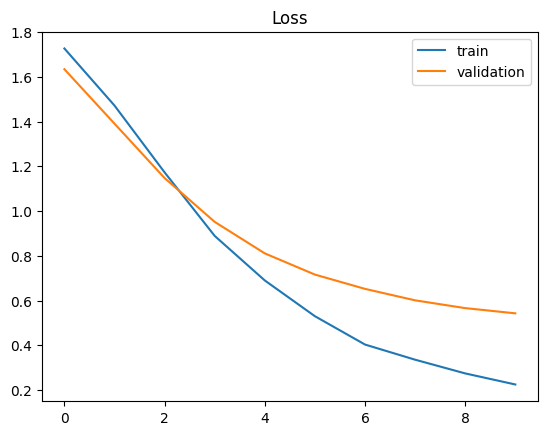

In [278]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [274]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

predicted = nn.predict(X_test_under)
print(classification_report(np.argmax(testing_labels, axis=1), np.argmax(predicted, axis=1)))

134/134 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       794
           1       0.52      0.92      0.66       484
           2       0.36      0.87      0.51       119
           3       0.28      0.94      0.43        62
           4       0.25      0.92      0.40        60
           5       0.95      0.65      0.77      2751

    accuracy                           0.74      4270
   macro avg       0.54      0.86      0.61      4270
weighted avg       0.85      0.74      0.76      4270



#### Advanced Scores

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

predicted = clfs[2].predict(X_test_under)
print(clfs_names[2])
print(classification_report(y_test, predicted))

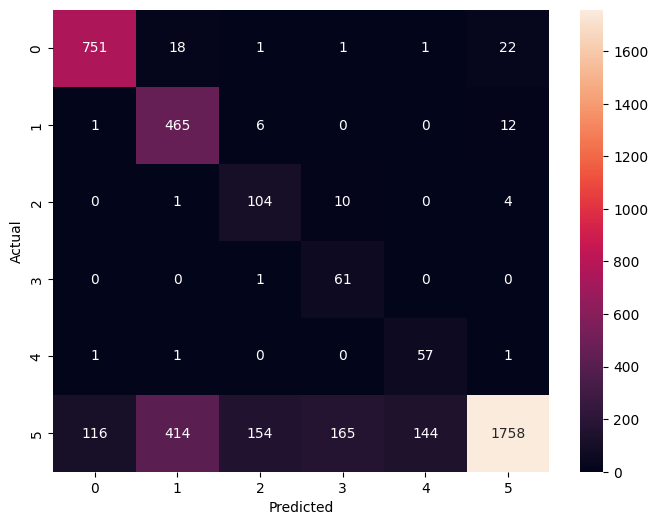

In [116]:
import seaborn as sns

conf_mat = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [117]:
# Sample
idx = X_test.sample(n=3).index
sample_X = [X_test[i] for i in idx]
sample_y = [y_test[i] for i in idx]

# Transfroming.
vectorised_documents = vectorizer.transform(sample_X)

# Execute prediction(classification).
predicted = clfs[2].predict(vectorised_documents)

# Show predicted data.
for i, category in enumerate(predicted):
    print("Predicted : {0}, True label : {1} => {2}".format(topics_names[category], topics_names[sample_y[i]], sample_X[i]))


Predicted : interest, True label : other => 
U.S. RETAIL SALES RISE MASKS WEAK TREND - ANALYSTS
    By Kathleen Hays, Reuters
    NEW YORK, March 12 - U.S. retail sales rose sharply in
February but many economists said the underlying consumer
spending trend remains weak.
    February retail sales jumped 4.1 pct, more than the 2.5-3.0
pct rise the financial markets had anticipated. But January's
sales were revised down to a 7.4 pct drop, from a previously
reported 5.8 pct decline.
    "The trend is toward continued spending but certainly at a
much more sluggish pace," said Don Maude of Midland Montagu
Capital Markets Inc.
    Maude averaged out the wide swings in the retail sales data
over past four months to show that the pace of consumer
spending is slowing.
    Combining the latest data with a 0.6 pct drop in November
and a 4.6 pct gain in December, the average retail sales gain
over the four months was 0.2 pct, he said, compared to to a 0.4
pct rise for year-over-year sales through 

### OverSampling

In [335]:
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(sampling_strategy="not majority")

In [336]:
def undersample_majorities_class(X, y, size, under = 4):
    y_min = y[y == under]
    X_min = X.filter(y_min.index,axis = 0)
    X_res = X_min
    y_res = y_min
    
    for i in [0, 1, 2, 3, 5]:
        y_i = y[y == i]
        X_i = X.filter(y_i.index,axis = 0)
        if len(y_i) > size:
            X_i, y_i = sample_together(size, X_i, y_i)
        X_res = pd.concat([X_res, X_i])
        y_res = pd.concat([y_res, y_i])
        
    return X_res, y_res

In [337]:
X_train_over, y_train_over = undersample_majorities_class(X_train, y_train, size=2000)

In [338]:
#Vectorized the data
X_train_over = vectorizer.fit_transform(X_train_over).toarray()
X_test_over = vectorizer.transform(X_test).toarray()

In [339]:
X_train_over, y_train_over = ROS.fit_resample(X_train_over, y_train_over)

#### Random Forest / MultinomialNB / OneVsRest

In [342]:
clfs = cl_fit(X_train_over, y_train_over)

c:\Users\Arthur Sauvage\Desktop\CA-CIB\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Arthur Sauvage\Desktop\CA-CIB\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [343]:
display_scores(clfs_names, clfs, X_train_over, y_train_over, X_test_over, y_test, cross_val=False)

-----------------------Score Test set-----------------------

RandomForest
accuracy : 0.840983606557377
each f1 score : [0.90609756 0.68359942 0.73722628 0.72580645 0.79661017 0.87255294]
macro f1 score : 0.7869821358961676 

MultinomialNB
accuracy : 0.6557377049180327
each f1 score : [0.86891386 0.67207074 0.33183857 0.31168831 0.32463768 0.67292792]
macro f1 score : 0.5303461795314033 

OneVsRes
accuracy : 0.8798594847775175
each f1 score : [0.92335116 0.79930796 0.69594595 0.6918239  0.77142857 0.90325108]
macro f1 score : 0.7975181018387487 

Multi-layer Perceptron (1 couche)
accuracy : 0.027868852459016394
each f1 score : [0.         0.         0.05422648 0.         0.         0.        ]
macro f1 score : 0.009037745879851141 

Multi-layer Perceptron (2 couche)
accuracy : 0.17681498829039813
each f1 score : [0.8079096  0.         0.18774861 0.01511628 0.11403509 0.        ]
macro f1 score : 0.1874682631841967 

Multi-layer Perceptron (3 couches)
accuracy : 0.28711943793911004
each

In [161]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

predicted = clfs[2].predict(X_test_over)
print(clfs_names[2])
print(classification_report(y_test, predicted))

OneVsRes
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       794
           1       0.70      0.95      0.80       484
           2       0.59      0.88      0.70       119
           3       0.56      0.94      0.70        62
           4       0.72      0.88      0.79        60
           5       0.97      0.84      0.90      2751

    accuracy                           0.88      4270
   macro avg       0.74      0.91      0.80      4270
weighted avg       0.91      0.88      0.89      4270



In [ ]:
def evaluation_oversampling(X_train, y_train, X_test, y_test):
    size = [500, 1000, 2000]
    ROS = RandomOverSampler(sampling_strategy="not majority")
    for s in size:
        print("Size of each category :",s)
        X_train_over, y_train_over = undersample_majorities_class(X_train, y_train, size=s)
        
        #Vectorized the data
        X_train_over = vectorizer.fit_transform(X_train_over)
        X_test_over = vectorizer.transform(X_test)
        
        X_train_over, y_train_over = ROS.fit_resample(X_train_over.toarray(), y_train_over)
        
        clfs = cl_fit(X_train_over, y_train_over)
        display_scores(clfs_names, clfs, X_train_over, y_train_over, X_test_over, y_test, cross_val=False)

In [143]:
evaluation_oversampling(X_train, y_train, X_test, y_test)

Size of each category : 500


AttributeError: 'numpy.ndarray' object has no attribute 'filter'

#### Neural Network

In [301]:
training_labels = tf.keras.utils.to_categorical(y_train_over)
testing_labels = tf.keras.utils.to_categorical(y_test)

In [307]:
nn = build_neural_network(X_train_over.shape[1])
history = nn.fit(X_train_over, training_labels, shuffle=True ,
                    epochs=5, batch_size=8, 
                    validation_split=0.15, verbose=1)

Epoch 1/5
734/734 [==============================] - 89s 121ms/step - loss: 0.5388 - accuracy: 0.8292 - val_loss: 0.6380 - val_accuracy: 0.7819
Epoch 2/5
734/734 [==============================] - 91s 125ms/step - loss: 0.1194 - accuracy: 0.9685 - val_loss: 0.6819 - val_accuracy: 0.7741
Epoch 3/5
 23/734 [..............................] - ETA: 1:53 - loss: 0.0423 - accuracy: 0.9891

KeyboardInterrupt: 

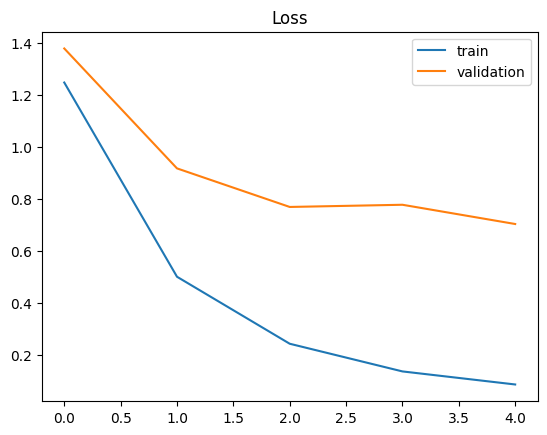

In [308]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [309]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

predicted = nn.predict(X_test_over)
print(classification_report(np.argmax(testing_labels, axis=1), np.argmax(predicted, axis=1)))

134/134 [==============================] - 3s 23ms/step
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       794
           1       0.55      0.98      0.70       484
           2       0.51      0.89      0.65       119
           3       0.52      0.89      0.66        62
           4       0.71      0.83      0.77        60
           5       0.98      0.76      0.86      2751

    accuracy                           0.83      4270
   macro avg       0.69      0.88      0.76      4270
weighted avg       0.89      0.83      0.84      4270



## Error Analyse